In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [2]:
#reading data from my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls '/content/drive/MyDrive/Capstone/brain'

Testing  Training


In [4]:
train_folder = '/content/drive/MyDrive/Capstone/brain/Training'
test_folder = '/content/drive/MyDrive/Capstone/brain/Testing'

In [5]:
#function to read in the images and labels
def read_images(folder):
  images = []
  labels = []
  for tumor in os.listdir(folder): #gives a list of the files in this path - all the tumor folders
    tumor_path = os.path.join(folder, tumor) #gives us the path to each tumor folder
    if os.path.isdir(tumor_path): #if this is an existing path, then proceed
      for file in os.listdir(tumor_path): #list of the files in the tumor path - testing and training in each tumor file
        tumor_image_path = os.path.join(tumor_path, file) #getting the specific path to the images
        tumor_image = image.load_img(tumor_image_path, target_size=(224, 224)) #loading image and setting target size to reshape later
        images.append(image.img_to_array(tumor_image)) #adding all the images to the images list and converting the image to an array
        labels.append(tumor) #adding labels (names of tumors) to the labels list
  images = np.array(images)
  labels = np.array(labels)
  return images, labels

In [6]:
#training data
X_train, y_train = read_images(train_folder)
X_train, y_train = shuffle(X_train, y_train, random_state=42)

#testing data
X_test, y_test = read_images(test_folder)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

In [7]:
X_train.shape, y_train_encoded.shape

((5714, 224, 224, 3), (5714, 4))

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
#trying model 4 with more Conv2D layers and a Dropout
model4 = Sequential()

model4.add(Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)))
model4.add(MaxPooling2D(2))
model4.add(Conv2D(64, 3, activation='relu'))
model4.add(MaxPooling2D(2))
model4.add(Conv2D(128, 3, activation='relu'))
model4.add(MaxPooling2D(2))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(4, activation='softmax'))

In [10]:
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [11]:
history4 = model4.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), batch_size=32, epochs=10)

Epoch 1/10
179/179 [==============================] - 24s 65ms/step - loss: 0.7471 - acc: 0.7023 - val_loss: 0.5411 - val_acc: 0.7841
Epoch 2/10
179/179 [==============================] - 9s 51ms/step - loss: 0.3976 - acc: 0.8425 - val_loss: 0.3491 - val_acc: 0.8581
Epoch 3/10
179/179 [==============================] - 9s 52ms/step - loss: 0.2661 - acc: 0.9013 - val_loss: 0.3045 - val_acc: 0.8795
Epoch 4/10
179/179 [==============================] - 9s 52ms/step - loss: 0.2069 - acc: 0.9254 - val_loss: 0.1714 - val_acc: 0.9321
Epoch 5/10
179/179 [==============================] - 9s 52ms/step - loss: 0.1435 - acc: 0.9498 - val_loss: 0.1930 - val_acc: 0.9382
Epoch 6/10
179/179 [==============================] - 9s 52ms/step - loss: 0.1147 - acc: 0.9555 - val_loss: 0.1327 - val_acc: 0.9580
Epoch 7/10
179/179 [==============================] - 9s 52ms/step - loss: 0.0880 - acc: 0.9685 - val_loss: 0.1419 - val_acc: 0.9481
Epoch 8/10
179/179 [==============================] - 9s 52ms/step -

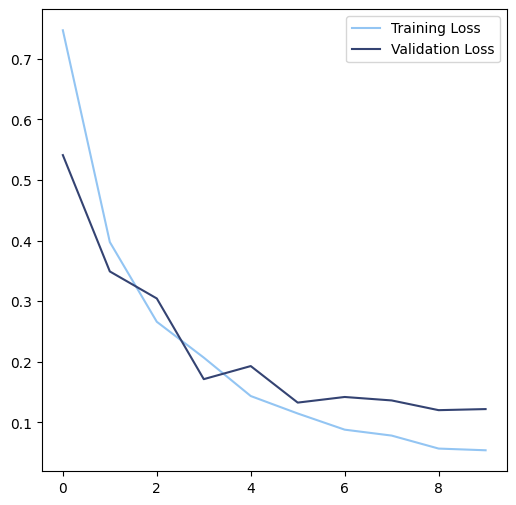

In [12]:
plt.figure(figsize=(6,6))
plt.plot(history4.history['loss'], c='#93C5F3', label='Training Loss')
plt.plot(history4.history['val_loss'], c='#344372', label='Validation Loss')
plt.legend();

In [13]:
model4.evaluate(X_test, y_test_encoded)

41/41 [==============================] - 1s 19ms/step - loss: 0.1220 - acc: 0.9687


[0.12195423990488052, 0.9687261581420898]

In [14]:
y_pred4 = model4.predict(X_test)
#y_pred4

41/41 [==============================] - 1s 17ms/step


In [15]:
y_prediction4 = np.argmax(y_pred4, axis=1)
y_prediction4

array([2, 2, 0, ..., 2, 1, 2])

In [16]:
y_true4 = np.argmax(y_test_encoded.values, axis=1)
y_true4

array([2, 2, 0, ..., 2, 1, 2])

In [17]:
matrix4 = confusion_matrix(y_true4, y_prediction4)
matrix4

array([[281,  19,   0,   0],
       [  9, 288,   6,   3],
       [  0,   0, 405,   0],
       [  0,   4,   0, 296]])

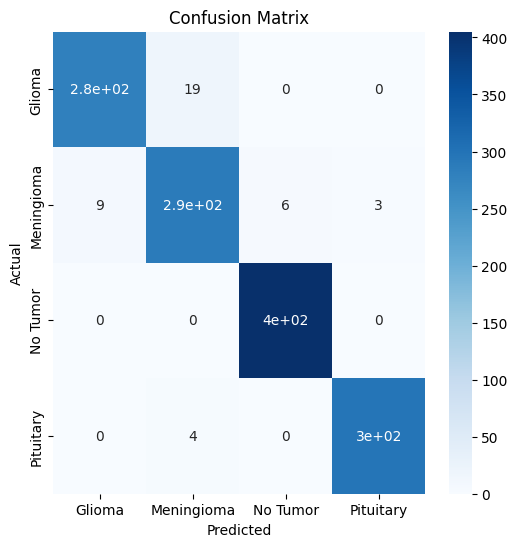

In [18]:
#plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(matrix4, annot=True, cmap='Blues', xticklabels=['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'], yticklabels=['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
model4_precision = precision_score(y_true4, y_prediction4, average=None)
model4_precision

array([0.96896552, 0.92604502, 0.98540146, 0.98996656])

In [20]:
model4_accuracy = accuracy_score(y_true4, y_prediction4)
model4_accuracy

0.9687261632341724

In [21]:
model4_recall = recall_score(y_true4, y_prediction4, average=None)
model4_recall

array([0.93666667, 0.94117647, 1.        , 0.98666667])

In [22]:
model4_f1_score = f1_score(y_true4, y_prediction4, average=None)
model4_f1_score

array([0.95254237, 0.93354943, 0.99264706, 0.98831386])

In [23]:
#baseline model
model_baseline = Sequential()

model_baseline.add(Conv2D(16, 3, activation='relu', input_shape=(224, 224, 3)))
model_baseline.add(MaxPooling2D(2))
model_baseline.add(Conv2D(32, 3, activation='relu'))
model_baseline.add(MaxPooling2D(2))
model_baseline.add(Flatten())
model_baseline.add(Dense(4, activation='softmax'))

In [24]:
model_baseline.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [25]:
history_baseline = model_baseline.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), batch_size=32, epochs=10)

Epoch 1/10
179/179 [==============================] - 8s 36ms/step - loss: 0.6346 - acc: 0.7518 - val_loss: 0.4682 - val_acc: 0.8230
Epoch 2/10
179/179 [==============================] - 4s 25ms/step - loss: 0.2376 - acc: 0.9198 - val_loss: 0.2845 - val_acc: 0.9016
Epoch 3/10
179/179 [==============================] - 4s 25ms/step - loss: 0.1469 - acc: 0.9485 - val_loss: 0.1905 - val_acc: 0.9245
Epoch 4/10
179/179 [==============================] - 4s 25ms/step - loss: 0.0663 - acc: 0.9790 - val_loss: 0.2000 - val_acc: 0.9397
Epoch 5/10
179/179 [==============================] - 4s 25ms/step - loss: 0.0308 - acc: 0.9921 - val_loss: 0.1813 - val_acc: 0.9519
Epoch 6/10
179/179 [==============================] - 4s 25ms/step - loss: 0.0192 - acc: 0.9947 - val_loss: 0.1859 - val_acc: 0.9420
Epoch 7/10
179/179 [==============================] - 4s 25ms/step - loss: 0.0100 - acc: 0.9986 - val_loss: 0.1878 - val_acc: 0.9481
Epoch 8/10
179/179 [==============================] - 4s 25ms/step - 

In [26]:
model_baseline.evaluate(X_test, y_test_encoded)

41/41 [==============================] - 0s 11ms/step - loss: 0.2271 - acc: 0.9497


[0.22706034779548645, 0.9496567249298096]

In [27]:
y_pred_baseline = model_baseline.predict(X_test)
#y_pred_baseline

41/41 [==============================] - 1s 10ms/step


In [28]:
y_prediction_baseline = np.argmax(y_pred_baseline, axis=1)
y_prediction_baseline

array([2, 2, 0, ..., 2, 1, 2])

In [29]:
y_true_baseline = np.argmax(y_test_encoded.values, axis=1)
y_true_baseline

array([2, 2, 0, ..., 2, 1, 2])

In [30]:
matrix_baseline = confusion_matrix(y_true_baseline, y_prediction_baseline)
matrix_baseline

array([[260,  40,   0,   0],
       [ 13, 283,   7,   3],
       [  0,   0, 405,   0],
       [  0,   3,   0, 297]])

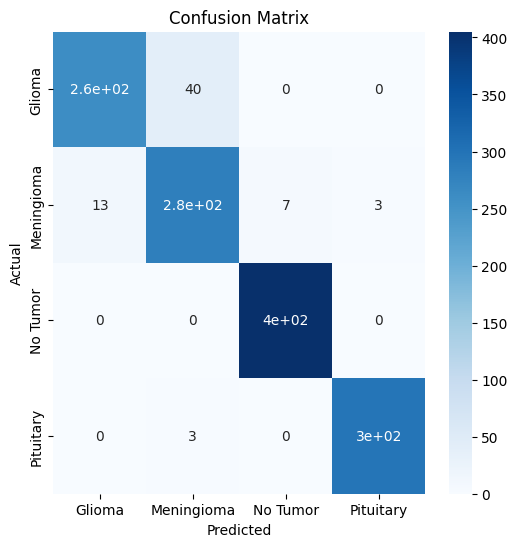

In [31]:
#plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(matrix_baseline, annot=True, cmap='Blues', xticklabels=['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'], yticklabels=['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
model_baseline_precision = precision_score(y_true_baseline, y_prediction_baseline, average=None)
model_baseline_precision

array([0.95238095, 0.86809816, 0.98300971, 0.99      ])

In [33]:
model_baseline_accuracy = accuracy_score(y_true_baseline, y_prediction_baseline)
model_baseline_accuracy

0.9496567505720824

In [34]:
model_baseline_recall = recall_score(y_true_baseline, y_prediction_baseline, average=None)
model_baseline_recall

array([0.86666667, 0.9248366 , 1.        , 0.99      ])

In [35]:
model_baseline_f1_score = f1_score(y_true_baseline, y_prediction_baseline, average=None)
model_baseline_f1_score

array([0.90750436, 0.89556962, 0.99143207, 0.99      ])

In [36]:
model4.save('model4.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
from google.colab import files

files.download('model4.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>